# K-Means||算法

![K-means||](picture/K-Means改算法.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.datasets as ds
import random

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
# 生成数据
N = 1500
centers=5
data, label = ds.make_blobs(n_features=2, n_samples=N, centers=centers)
print(data)
print(label)

[[ 9.24424763 -5.06082653]
 [ 7.55829854 -4.23521226]
 [ 4.22373337  7.80556668]
 ...
 [ 6.54202524  7.79397199]
 [-1.89938746  3.54382719]
 [10.61281482  7.33601338]]
[2 2 1 ... 3 4 0]


In [3]:
# 取部分数据
num_samples = int(centers * np.log(N))
print(num_samples)

36


In [4]:
index = [i for i in range(N)]
random.shuffle(index)
data2, label2 = data[index[0:num_samples]], label[index[0:num_samples]]

In [5]:
km1 = KMeans(n_clusters=centers, init='k-means++')
km1.fit(data2, label2)

KMeans(n_clusters=5)

In [6]:
center_pos = km1.cluster_centers_
print(center_pos)

[[ 6.02645004  9.43148453]
 [ 7.8222079  -4.56211717]
 [ 3.37140509  6.24595861]
 [-1.7967581   2.71745369]
 [ 9.86032064  8.848781  ]]


In [7]:
km2 = KMeans(n_clusters=centers, init=center_pos)
km2.fit(data, label)

D:\anaconda3\envs\IntoFantasy\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[ 6.02645004,  9.43148453],
       [ 7.8222079 , -4.56211717],
       [ 3.37140509,  6.24595861],
       [-1.7967581 ,  2.71745369],
       [ 9.86032064,  8.848781  ]]),
       n_clusters=5)

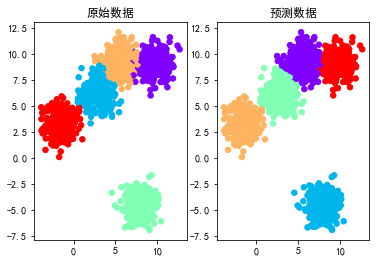

In [8]:
pre = km2.predict(data)

file,ax = plt.subplots(1, 2)
ax[0].scatter(data[:, 0], data[:, 1], c=label, s=30, cmap='rainbow')
ax[1].scatter(data[:, 0], data[:, 1], c=pre, s=30, cmap='rainbow')
ax[0].set_title('原始数据')
ax[1].set_title('预测数据')
plt.show()